In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
url = "https://github.com/brendanpshea/data-science/raw/main/data/titanic_train.csv"
data = pd.read_csv(url)

# Data insights

In [147]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [148]:
data.shape

(891, 12)

In [149]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [151]:
data.drop(["Name"],axis=True,inplace=True)

In [152]:
data.drop(["SibSp","Parch","Fare","Cabin","Ticket"],axis=True,inplace=True)

In [153]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')

In [154]:
data.rename(columns={"Pclass":"Passenger_class","Embarked":"Boarding_station"},inplace=True)

In [102]:
data.columns

Index(['PassengerId', 'Survived', 'Passenger_class', 'Sex', 'Age',
       'Boarding_station'],
      dtype='object')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Passenger_class   891 non-null    int64  
 3   Sex               891 non-null    object 
 4   Age               714 non-null    float64
 5   Boarding_station  889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [155]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [156]:
data["Boarding_station"].value_counts()

Boarding_station
S    644
C    168
Q     77
Name: count, dtype: int64

In [107]:
data.isnull().any()

PassengerId         False
Survived            False
Passenger_class     False
Sex                 False
Age                  True
Boarding_station     True
dtype: bool

In [108]:
data.isnull().sum()/data.shape[0]*100

PassengerId          0.000000
Survived             0.000000
Passenger_class      0.000000
Sex                  0.000000
Age                 19.865320
Boarding_station     0.224467
dtype: float64

In [109]:
data.duplicated().sum()

0

>Explotary analysis


> target : survived

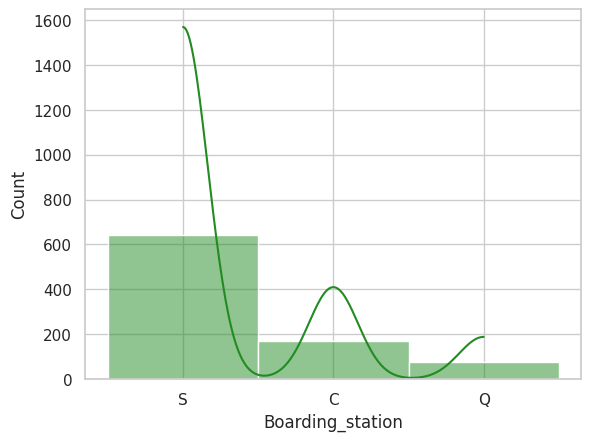

<Figure size 1000x600 with 0 Axes>

In [110]:
sns.set(style="whitegrid")
sns.histplot(data=data["Boarding_station"],color="forestgreen",kde=True)
plt.figure(figsize=(10,6))
plt.show()

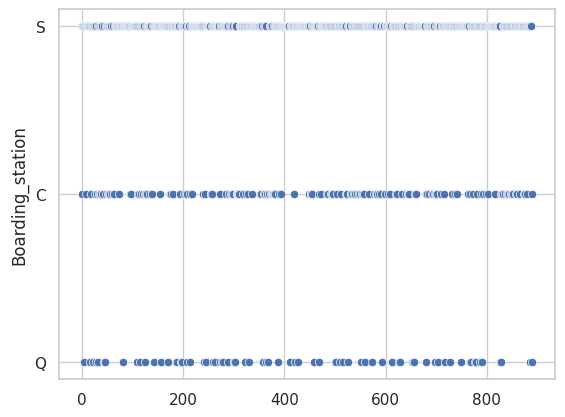

In [111]:
sns.scatterplot(data["Boarding_station"],markers=True)
plt.show()

>outlier detection

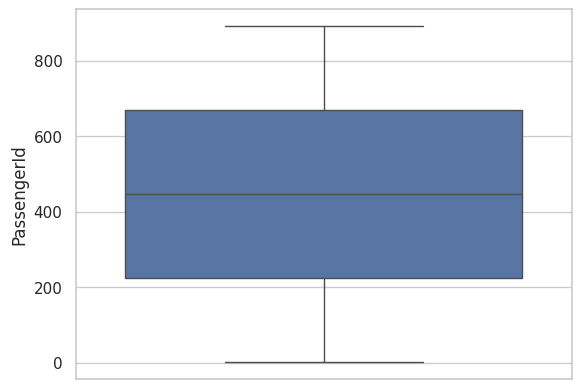

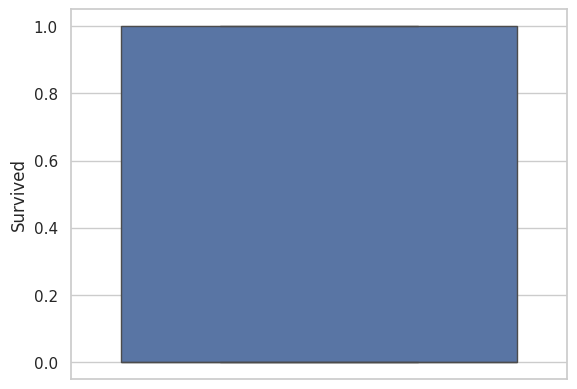

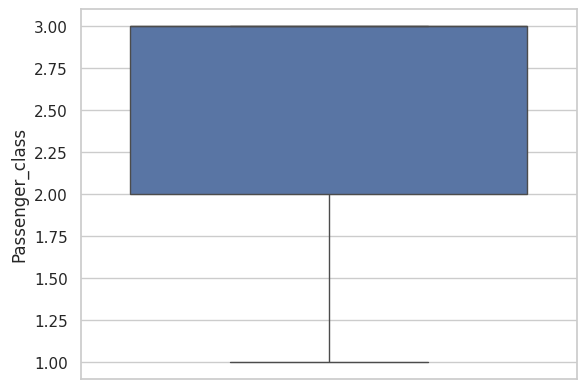

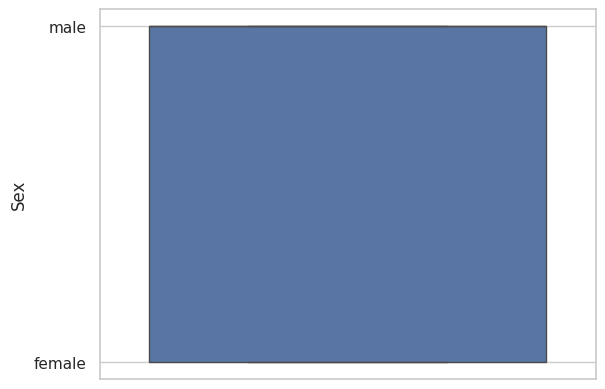

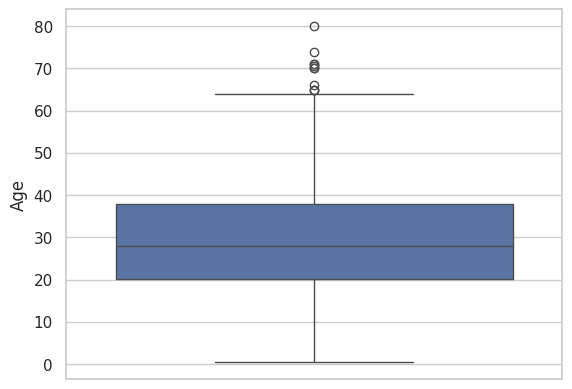

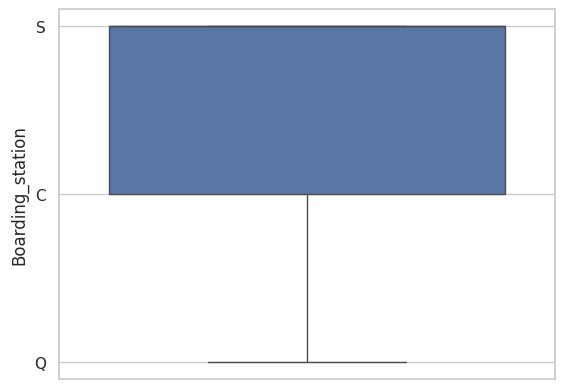

In [112]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()
    print()



In [23]:
#Age have outliers


>Missing value treatment

In [24]:
data.duplicated().sum()

0

In [25]:
data.isnull().sum()

PassengerId           0
Survived              0
Passenger_class       0
Sex                   0
Age                 177
Ticket_id             0
Boarding_station      2
dtype: int64

In [158]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [157]:
for i in data.select_dtypes(include="number").columns:
    data[i]=impute.fit_transform(data[[i]])

In [115]:
data.isnull().sum()

PassengerId         0
Survived            0
Passenger_class     0
Sex                 0
Age                 0
Boarding_station    2
dtype: int64

In [159]:
for i in ["Boarding_station"]:
    data[i].fillna(data[i].median,inplace=True)

In [117]:
data.isnull().sum()

PassengerId         0
Survived            0
Passenger_class     0
Sex                 0
Age                 0
Boarding_station    0
dtype: int64

>outliers

In [193]:
def  outlier_detector(column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(.75)
    IQR=Q3-Q1
    lower_bound=Q1-IQR*1.5
    upper_bound=Q3+IQR*1.5
    return lower_bound,upper_bound

In [194]:
lower_bound,upper_bound=outlier_detector(["Age"])
print(lower_bound,"\n",upper_bound)

Age    4.0
dtype: float64 
 Age    52.0
dtype: float64


In [162]:
data["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [195]:
print(type(lower_bound))

<class 'pandas.core.series.Series'>


In [196]:
lower_bound=float(lower_bound)
upper_bound=float(upper_bound)

<ipython-input-196-18b80bc30e59>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lower_bound=float(lower_bound)
<ipython-input-196-18b80bc30e59>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  upper_bound=float(upper_bound)


In [197]:
print(type(lower_bound))

<class 'float'>


In [167]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [198]:
data=data[(data["Age"]>=lower_bound)&(data["Age"]<=upper_bound)]

<Axes: xlabel='Age'>

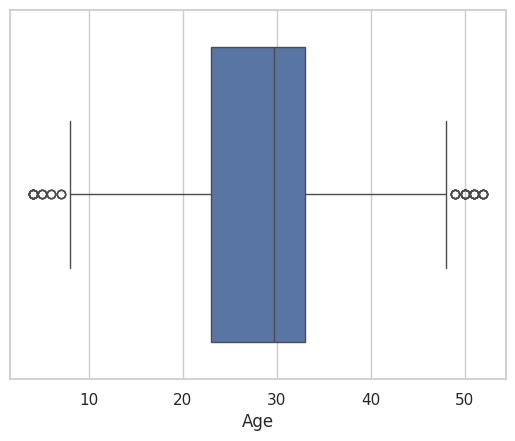

In [199]:
sns.boxplot(x=data["Age"])

<Axes: >

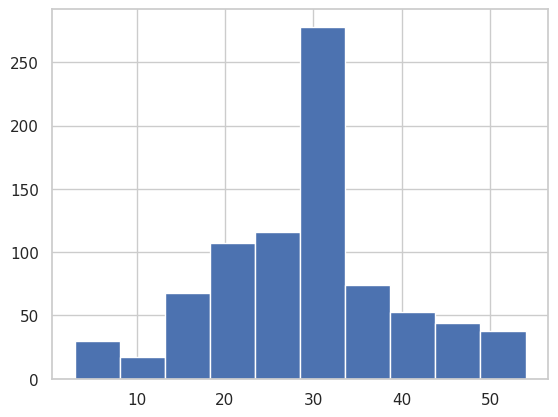

In [169]:
data["Age"].hist()

In [201]:
target=data[["Survived"]]
influencers=data.drop(["Survived"],axis=1)

In [202]:
#encoding of data
target=pd.get_dummies(target,drop_first=True)
influencers=pd.get_dummies(influencers,drop_first=True)

In [203]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaleMinMax=MinMaxScaler()

scaleMinMax.fit(target)
target = scaleMinMax.transform(target)

scaleMinMax.fit(influencers)
influencers = scaleMinMax.transform(influencers)


In [204]:
print(type(target))
print(type(influencers))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [205]:
#conver them back to DF
target=pd.DataFrame(target)
influencers=pd.DataFrame(influencers)

In [206]:
print(type(target))
print(type(influencers))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [207]:
influencers.describe()

,0,1,2,3,4,5,6
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.503533,0.675309,0.516531,0.644444,0.183951,0.090123,0.724691
std,0.289429,0.411675,0.201638,0.478977,0.387683,0.286535,0.446946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253090,0.500000,0.395833,0.000000,0.000000,0.000000,0.000000
50%,0.501685,1.000000,0.535398,1.000000,0.000000,0.000000,1.000000
75%,0.757022,1.000000,0.604167,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
target.head()

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [209]:
influencers.head()


,0,1,2,3,4,5,6
0,0.000000,1.0,0.375000,1.0,0.0,0.0,1.0
1,0.001124,0.0,0.708333,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.458333,0.0,0.0,0.0,1.0
3,0.003371,0.0,0.645833,0.0,0.0,0.0,1.0
4,0.004494,1.0,0.645833,1.0,0.0,0.0,1.0


In [213]:
#split data
from sklearn.model_selection import train_test_split as TTS


In [262]:
x_train,x_test,y_train,y_test=TTS(influencers,target,test_size=0.2,random_state=7)

In [259]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(648, 7)
(648, 1)
(162, 7)
(162, 1)


In [260]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [248]:
print(f'Training set size: {x_train.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')

Training set size: 648 samples
Test set size: 162 samples


In [250]:
x_train.head()

,0,1,2,3,4,5,6
753,0.934831,1.0,0.535398,1.0,1.0,0.0,0.0
435,0.540449,0.5,0.535398,1.0,0.0,0.0,1.0
74,0.093258,0.0,0.500000,1.0,0.0,0.0,1.0
412,0.510112,1.0,0.535398,1.0,0.0,0.0,1.0
128,0.159551,1.0,0.416667,0.0,0.0,0.0,1.0


In [263]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

predict=model.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, predict)
#print('MSE:', mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

<ipython-input-263-776bc1adaa6f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RMSE: 0.4095865123647398


In [253]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [254]:
#LinearRegression

from sklearn.linear_model import LinearRegression

# Initialize and train the model
Model_LReg = LinearRegression()
Model_LReg.fit(x_train, y_train)

# Make predictions and evaluate performance
pred_Model_LReg = Model_LReg.predict(x_test)
# Model_LReg_score = Model_LReg.score(x_test, y_test)
# print('Linear Regression model score:', Model_LReg_score)

# Calculate MSE
mse = mean_squared_error(y_test, pred_Model_LReg)
#print('MSE:', mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.3859219913392224
